# Convolutional Neural Network with Keras (Part 2) 

**What is Keras?** Keras is a wrapper that allows you to implement Deep Neural Networks without getting into intrinsic details of the Network. It can use *Tensorflow* or *Theano* as backend. 


In this lab you will build the *VGG16 network* and explore *tranfer learning* for image classification (classify whether an image contains an airplane or automobile or bird or cat or deer or dog or frog or horse or ship or truck).

# Importing libraries

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt


import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers import (Dense, 
                                     BatchNormalization, 
                                     LeakyReLU, 
                                     Reshape, 
                                     Conv2DTranspose,
                                     Conv2D,
                                     Dropout,
                                     Flatten)

import tensorflow_addons as tfa
import tensorflow_datasets as tfds

%matplotlib inline

# Importing Dataset

Here we are loading the cifar10 Dataset which is preloaded in tensorflow. <br>

Calling the `load_data` function on this object returns splitted train and test data in form of (features, target).

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Overview of Dataset

The CIFAR10 dataset contains 60,000 (32 x 32 pixel) color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.<br>
>The shape (50000, 32, 32, 3) represents **50000** images each of dimension **32 x 32 x 3**.<br>
The shape **(50000, )** represents (50000, 1) shape i.e. 50000 labels, each for one image.

In [3]:
print(f'Shape of the training data: {train_images.shape}')
print(f'Shape of the training target: {train_labels.shape}')
print(f'Shape of the test data: {test_images.shape}')
print(f'Shape of the test target: {test_labels.shape}')

Shape of the training data: (50000, 32, 32, 3)
Shape of the training target: (50000, 1)
Shape of the test data: (10000, 32, 32, 3)
Shape of the test target: (10000, 1)


In [4]:
print(train_labels)
np.unique(train_labels, return_counts=True)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

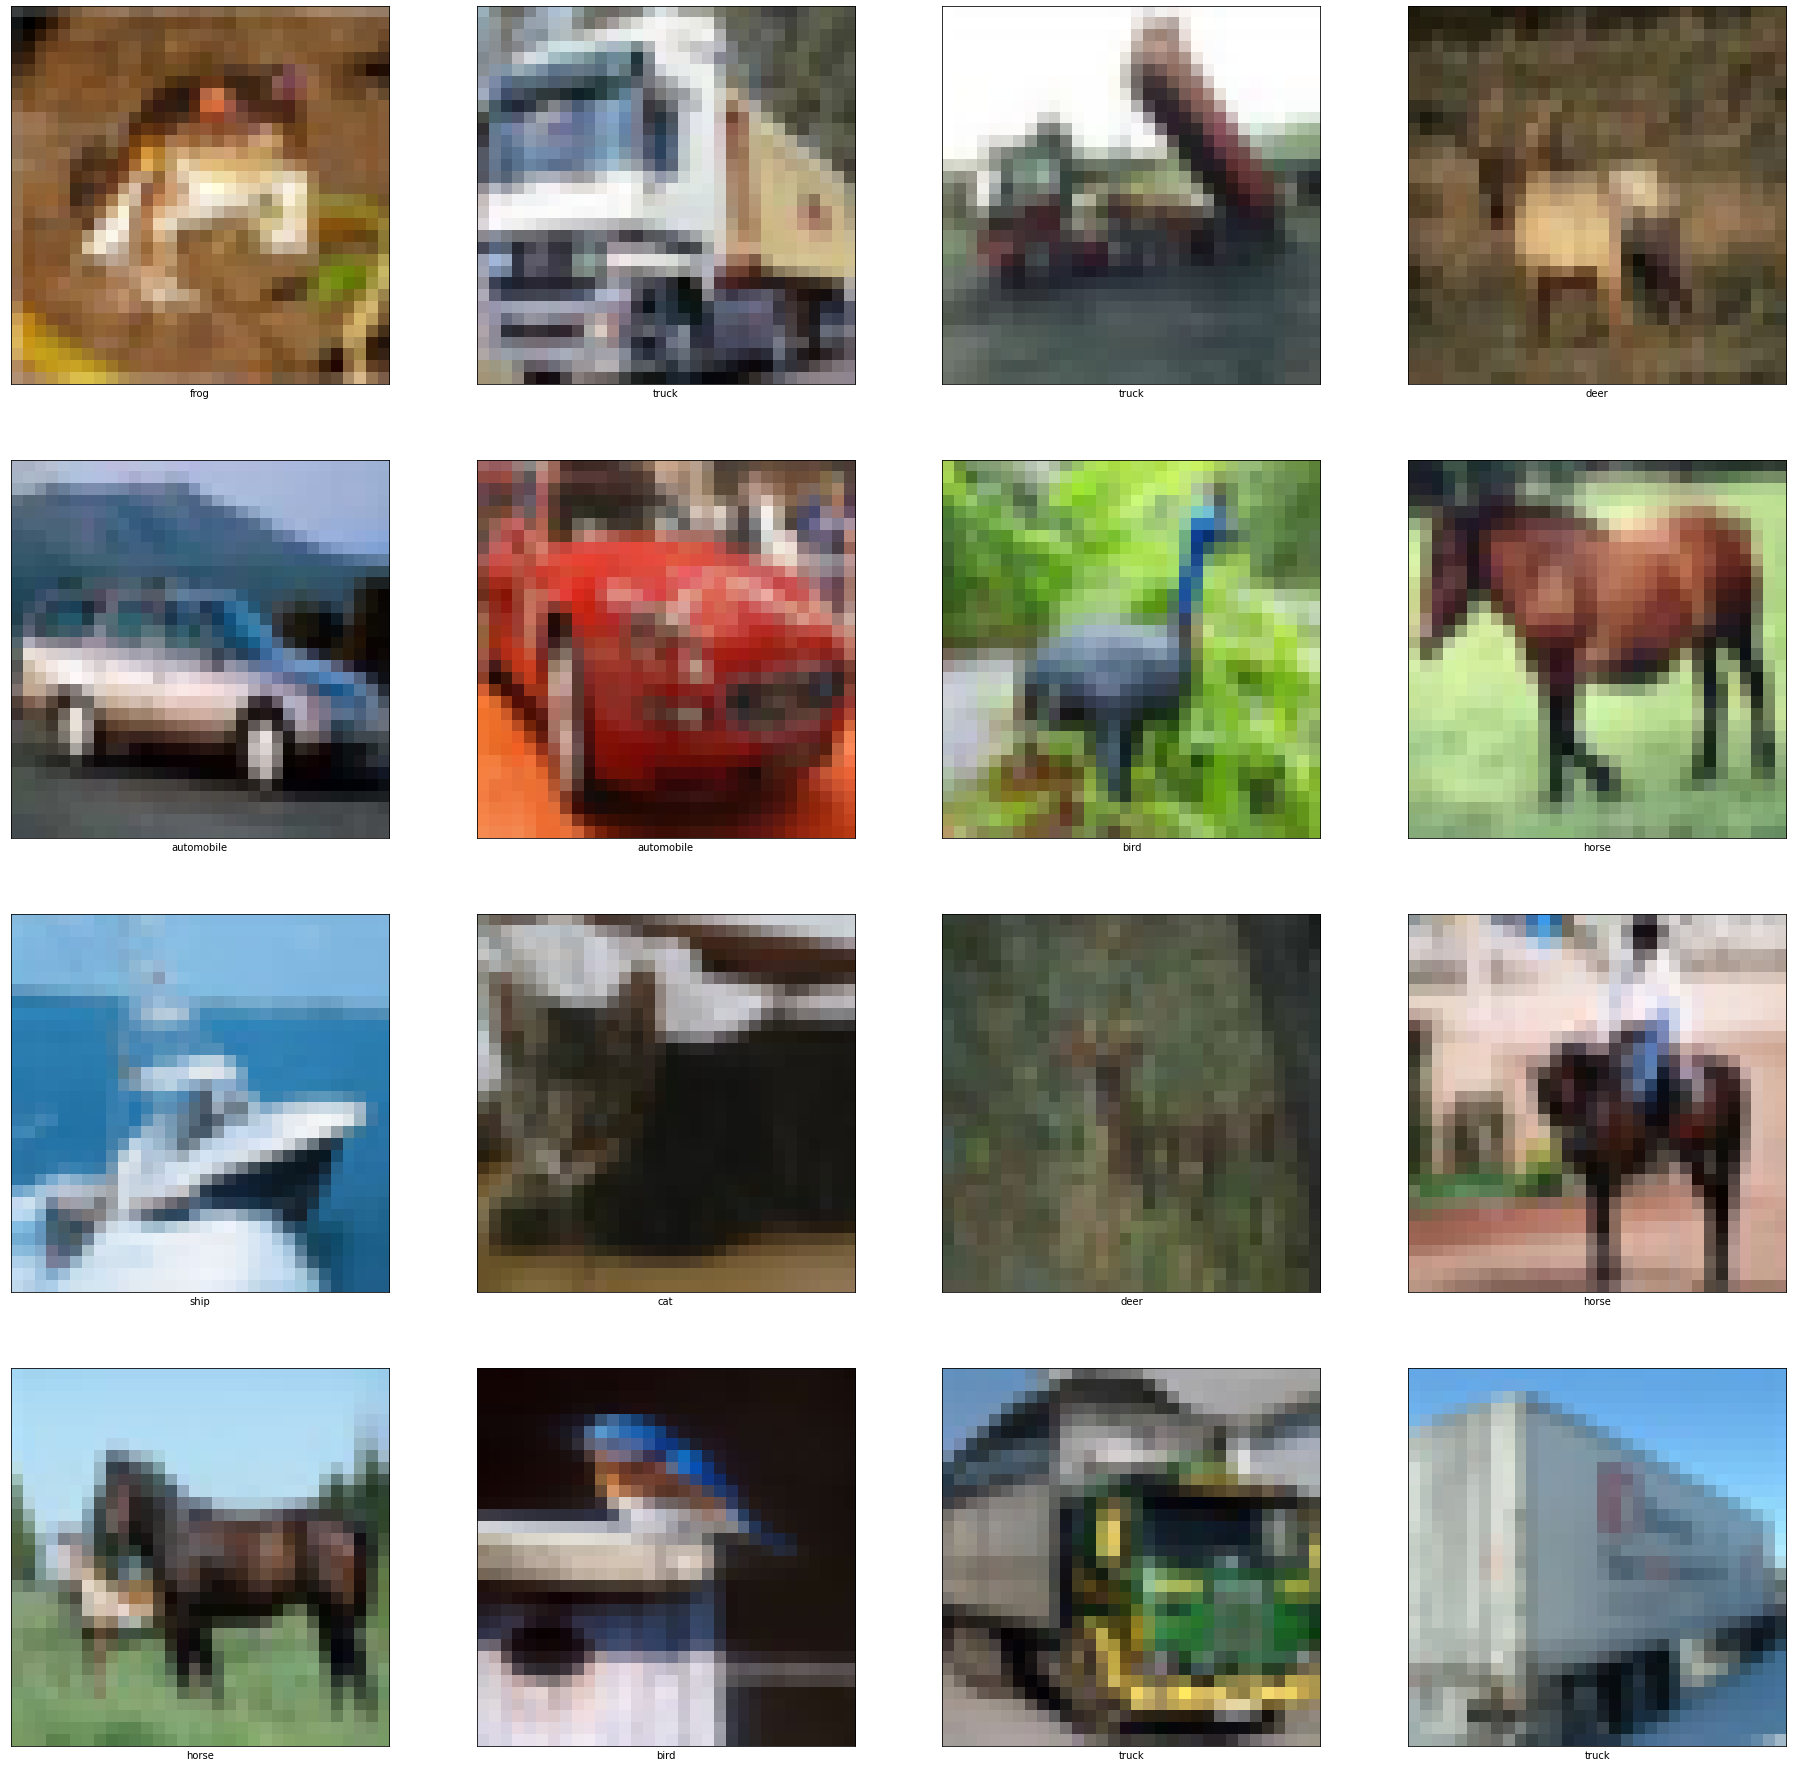

In [5]:
# To verify that the dataset looks correct, let's plot the first 16 images from the training set and display the class name below each image.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(32,32))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Preprocessing

Normalizing i.e. scaling the pixels to 0-1 from 0-255.

In [5]:
# Normalizing
train_images, test_images = train_images / 255.0, test_images / 255.0

# Modelling

There are two types of models in Tensorflow:
 - **Sequential**
 - **Graphical**

## Models
`tf.keras.model.Sequential()` 
lets you create a linear stack of layers providing a Sequential netural network.<br>
`tf.model()`
allows you to create arbitarary graph of layers as long as there is no cycle.

## Convolution Layer
`tf.keras.layers.Conv2D()` Convolution layer takes the following argument
> * **filters** Number of different types of convolutions used. Initially they are set to some predefined convolution and slowly trained to find better features in the image.
* **kernel_size** An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
* **strides** An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Default value is (1,1)
* **padding** One of "valid" or "same" (case-insensitive): <br>
 VALID Padding: it means no padding and it assumes that all the dimensions are valid so that the input image gets fully covered by a filter and the stride specified by you. <br>
 SAME Padding: it applies padding to the input image so that the input image gets fully covered by the filter and specified stride. It is called SAME because, for stride 1 , the output will be the same as the input. 
* **activation** activation function. Default value is: None
* **use_bias** Boolean, whether the layer uses a bias vector. Default value is: True
* **input_shape** Size of each input to the convolution.

## Pooling
`tf.keras.layers.MaxPooling2D()` Max Pooling layer to reduce the size of the input. This layer takes the following arguments:
> * **pool_size** Dimension of pooling kernel. Default value is (2, 2)
* **strides** Integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. Default value is: None
* **padding** One of "valid" or "same" (case-insensitive). "valid" adds no zero padding. "same" adds padding such that if the stride is 1, the output shape is the same as input shape. Default value is "valid".<br>
`tf.keras.layers.AveragePooling2D()` Average Pooling layer to reduce the size of the input.


## Flatten Layer
`tf.keras.layers.Flatten()` flattens the input.<br>
For input of `(batch_size, height, width, depth)` the output converts to `(batch_size, height * width * depth)`

## Dense Layer
`tf.keras.layers.Dense()` Normal dense layer (= fully connected layer): each node/neuron in this layer is connected to each node in the input layer. <br>
>The two arguments passes below in dense layer are *units* and *activation* (activation function).<br>
* **units** corresponds to the number of nodes in the layer<br>
* **activation** is an element-wise activation function.
    * **relu**: This activation function converts every negative value to 0 and positive remains the same
    * **softmax**: This function takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers.


## Compiling model
`model.compile()` Sets up the optimiser, loss and metrics configuration.
> * **optimizer**: updates the parameter of the Neural Network.
* **loss**: Measures the error in our model.
* **metrics**: Used to judge the model. The difference between metrics and loss is that metrics in not used to evaluate the model while training, whereas loss evaluates the model error while training and helps optimizer reduce the error.

# Creating by yourselves the VGG16

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size; color_channels refer to (R,G,B). 
In this example, we will build the VGG16 network and configure it to process inputs of shape (32, 32, 3). We can do this by passing the argument input_shape to our first layer.


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", input_shape=(32,32,3)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
# Continue adding the next blocks/layers of VGG-16 
# Do not forget to flatten after the last pooling layer and before feeding to the first fully connected one


model.compile(optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])



# Using the built-in Keras code and weights of VGG16


Keras provides access to a number of top-performing pre-trained models that were developed for image recognition tasks.

They are available via the Applications API, and include functions to load a model with or without the pre-trained weights, and prepare data in a way that a given model may expect (e.g. scaling of size and pixel values).

The first time a pre-trained model is loaded, Keras will download the required model weights, which may take some time given the speed of your internet connection. 

When loading a given model, the “include_top” argument can be set to False, in which case the model's fully-connected layers and the output layer, will not be loaded, allowing new layers to be added and trained. A model without a top will output activations from the last convolutional or pooling layer directly.
Additionally, when the “include_top” argument is False, the “input_tensor” argument must be specified, allowing the expected fixed-sized input of the model to be changed. 

Alternately, we may wish to use the VGG16 model layers, but train the new layers of the model without updating the weights of the VGG16 layers (aka freeze these weights). This will allow the new added layers to learn to interpret the learned features of the VGG16.
This can be achieved by setting the “trainable” property on each of the layers in the loaded VGG model to False prior to training. 
You can pick and choose which layers are trainable.


In [6]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

# load model without classifier layers
model = VGG16(include_top=False, weights="imagenet", input_shape=(32, 32, 3)) 
    
### If we want to freeze these pretrained weights:

#for layer in model.layers:
#	layer.trainable = False     # mark loaded layers as not trainable

# add new classifier layers
flat1 = layers.Flatten()(model.layers[-1].output)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(10, activation='softmax')(fc2)


# define new model
model = Model(inputs=model.inputs, outputs=output)

model.compile(optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])



In [6]:
class ReflectionPadding2D(layers.Layer):
    """Implements Reflection Padding as a layer.

    Args:
        padding(tuple): Amount of padding for the
        spatial dimensions.

    Returns:
        A padded tensor with the same type as the input tensor.
    """


    def __init__(self, padding=(1, 1), **kwargs):
        self.padding = tuple(padding)
        super(ReflectionPadding2D, self).__init__(**kwargs)

    def call(self, input_tensor, mask=None):
        padding_width, padding_height = self.padding
        padding_tensor = [
            [0, 0],
            [padding_height, padding_height],
            [padding_width, padding_width],
            [0, 0],
        ]
        return tf.pad(input_tensor, padding_tensor, mode="REFLECT")


def residual_block(
    x,
    activation,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="valid",
    use_bias=False,
):
    dim = x.shape[-1]
    input_tensor = x

    x = ReflectionPadding2D()(input_tensor)
    x = layers.Conv2D(
        dim,
        kernel_size,
        strides=strides,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization()(x)
    x = activation(x)

    x = ReflectionPadding2D()(x)
    x = layers.Conv2D(
        dim,
        kernel_size,
        strides=strides,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization()(x)
    x = layers.add([input_tensor, x])
    return x


def downsample(
    x,
    filters,
    activation,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding="same",
    use_bias=False,
):
    x = layers.Conv2D(
        filters,
        kernel_size,
        strides=strides,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization()(x)
    if activation:
        x = activation(x)
    return x


def upsample(
    x,
    filters,
    activation,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding="same",
    use_bias=False,
):
    x = layers.Conv2DTranspose(
        filters,
        kernel_size,
        strides=strides,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization()(x)
    if activation:
        x = activation(x)
    return x



In [7]:
#from keras.applications.efficientnet.EfficientNetB7 import EfficientNetB7
from keras.models import Model
import efficientnet.tfkeras
import efficientnet.keras as efn 

# load model without classifier layers
model = efn.EfficientNetB3(include_top=False, weights="imagenet", input_shape=(256, 256, 3))
    
### If we want to freeze these pretrained weights:

#for layer in model.layers:
    #layer.trainable = False     # mark loaded layers as not trainable

model.trainable = False

# add new classifier layers 
flat1 = layers.Flatten()(model.layers[-1].output)
fc1 = layers.Dense(4096, activation='relu')(flat1)
fc2 = layers.Dense(4096, activation='relu')(fc1)
output = layers.Dense(10, activation='softmax')(fc2)


# define new model
model = Model(inputs=model.inputs, outputs=output)

model.compile()


## Model details

Let's look at details of the model.


In [7]:
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)        

## Training

```model.fit``` trains the model.
> * **train_images**: Training data/features
* **train_labels**: Target
* **epochs**: Number of times the entire dataset is fed in the model



In [ ]:
# Training
history = model.fit(train_images, train_labels, epochs=10, batch_size=128,
                    validation_data=(test_images, test_labels))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

## Visualize prediction

Now let's visualize the prediction using the model you just trained. 
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the ground truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

In [ ]:
import pdb
y_hat = model.predict(test_images)

# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = test_labels[index][0]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Visualising feature maps

In [ ]:
from numpy import expand_dims
from keras.models import Model

# redefine model to output right after the first conv layer
model1 = Model(inputs=model.inputs, outputs=model.layers[1].output)
model1.summary()
# load the image with the required shape
img = train_images[0]
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# get feature map for first conv layer
feature_maps = model1.predict(img)
# plot all 32 maps in 8x8 squares
square1 = 8
square2 = 8
ix = 1

# Display the input image
plt.imshow(img[0])


figure = plt.figure(figsize=(20, 20))
for _ in range(square1):
	for _ in range(square2):
		ax = figure.add_subplot(square1, square2, ix, xticks=[], yticks=[])
    # Display each image
		# plot filter channel in grayscale
		ax.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()